In [2]:
from model import Categories,Item,SaleItem

cat1 = Categories('03-06-2024','cat_001','Local coffee')

i1 = Item ('12-06-2024','i_001','super_coffee',"0000",3900,3500,cat1)
i2 = Item ('17-06-2024','i_002','sunday_coffee',"0000",3450,3000,cat1)
i3 = Item ('01-06-2024','i_003','hsu_coffee',"0000",5450,5200,cat1)

In [3]:
from model import SaleItem


sale1=  SaleItem(customer_id='CU_000001',created_date='15-06-2024',item=i1 )
sale2=  SaleItem(customer_id='CU_000001',created_date='21-06-2024',item=i1 )
sale3=  SaleItem(customer_id='CU_000001',created_date='21-06-2024',item=i2 )
sale4=  SaleItem(customer_id='CU_000001',created_date='21-06-2024',item=i3 )
sale5=  SaleItem(customer_id='CU_000001',created_date='01-07-2024',item=i2 )
sale6=  SaleItem(customer_id='CU_000001',created_date='01-07-2024',item=i1 )
sale7=  SaleItem(customer_id='CU_000001',created_date='10-07-2024',item=i3 )
sale8=  SaleItem(customer_id='CU_000001',created_date='10-07-2024',item=i2 )
sale9=  SaleItem(customer_id='CU_000001',created_date='10-07-2024',item=i3 )
total_sale = [sale1,sale2,sale3,sale4,sale5,sale6,sale7,sale8,sale9]

In [4]:
!pip install pandas

  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 26.8 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 23.4 MB/s eta 0:00:00a 0:00:01
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)


In [5]:
sale_item_dict = {
    "created_date" :[],
    "item_name" :[],
    "profit" : [],
    "category_name" : []
}
for cur_obj in total_sale:
    sale_item_dict["created_date"].append(cur_obj.created_date)
    sale_item_dict["item_name"].append(cur_obj.item.name)
    sale_item_dict["profit"].append(cur_obj.item.getProfit())
    sale_item_dict["category_name"].append(cur_obj.item.category.name)


import pandas as pd
sale_item_df = pd.DataFrame(sale_item_dict)
sale_item_df

,created_date,item_name,profit,category_name
0,15-06-2024,super_coffee,400,Local coffee
1,21-06-2024,super_coffee,400,Local coffee
2,21-06-2024,sunday_coffee,450,Local coffee
3,21-06-2024,hsu_coffee,250,Local coffee
4,01-07-2024,sunday_coffee,450,Local coffee
5,01-07-2024,super_coffee,400,Local coffee
6,10-07-2024,hsu_coffee,250,Local coffee
7,10-07-2024,sunday_coffee,450,Local coffee
8,10-07-2024,hsu_coffee,250,Local coffee


In [6]:
sale_item_df.iloc[0]

created_date       15-06-2024
item_name        super_coffee
profit                    400
category_name    Local coffee
Name: 0, dtype: object

In [7]:
sale_item_df["item_name"]

0     super_coffee
1     super_coffee
2    sunday_coffee
3       hsu_coffee
4    sunday_coffee
5     super_coffee
6       hsu_coffee
7    sunday_coffee
8       hsu_coffee
Name: item_name, dtype: object

In [8]:
sale_item_df[sale_item_df["item_name"] == "super_coffee"]

,created_date,item_name,profit,category_name
0,15-06-2024,super_coffee,400,Local coffee
1,21-06-2024,super_coffee,400,Local coffee
5,01-07-2024,super_coffee,400,Local coffee


In [17]:
dict_item_name = set(sale_item_df["item_name"].to_numpy())
print(dict_item_name)

{'super_coffee', 'hsu_coffee', 'sunday_coffee'}


In [18]:
for cur_item_name in dict_item_name:
    cur_df = sale_item_df[sale_item_df["item_name"] == cur_item_name]
    print(cur_df)

  created_date     item_name  profit category_name
0   15-06-2024  super_coffee     400  Local coffee
1   21-06-2024  super_coffee     400  Local coffee
5   01-07-2024  super_coffee     400  Local coffee
  created_date   item_name  profit category_name
3   21-06-2024  hsu_coffee     250  Local coffee
6   10-07-2024  hsu_coffee     250  Local coffee
8   10-07-2024  hsu_coffee     250  Local coffee
  created_date      item_name  profit category_name
2   21-06-2024  sunday_coffee     450  Local coffee
4   01-07-2024  sunday_coffee     450  Local coffee
7   10-07-2024  sunday_coffee     450  Local coffee


In [25]:
import numpy as np

In [27]:

for cur_item_name in dict_item_name:
    cur_df = sale_item_df[sale_item_df["item_name"] == cur_item_name]
    
    x = list(set(cur_df["created_date"].to_numpy()))
    # ['21-06-2024', '15-06-2024', '01-07-2024']
    # ['10-07-2024', '21-06-2024']
    # ['10-07-2024', '21-06-2024', '01-07-2024']
    y = []
    for cur_x in x:
        temp_y = cur_df[cur_df["created_date"] == cur_x]["profit"].to_numpy()
        y.append(np.sum(temp_y))
    print(cur_item_name)
    print(x)
    print(y)


super_coffee
['21-06-2024', '15-06-2024', '01-07-2024']
[np.int64(400), np.int64(400), np.int64(400)]
hsu_coffee
['10-07-2024', '21-06-2024']
[np.int64(500), np.int64(250)]
sunday_coffee
['10-07-2024', '21-06-2024', '01-07-2024']
[np.int64(450), np.int64(450), np.int64(450)]


In [29]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 9.9 MB/s eta 0:00:00:00:010:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 18.3 MB/s eta 0:00:00
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)


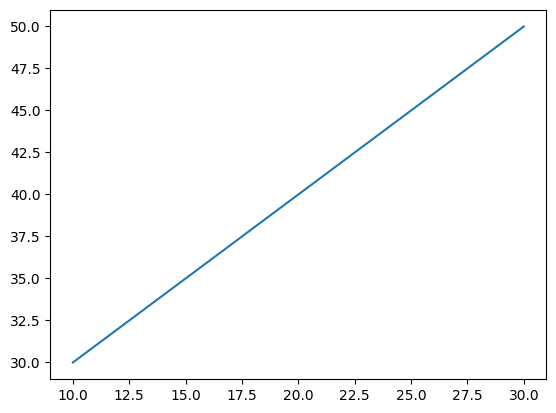

In [31]:
import matplotlib.pyplot as plt
x = [10,20,30]
y = [30,40,50]
plt.plot(x,y)

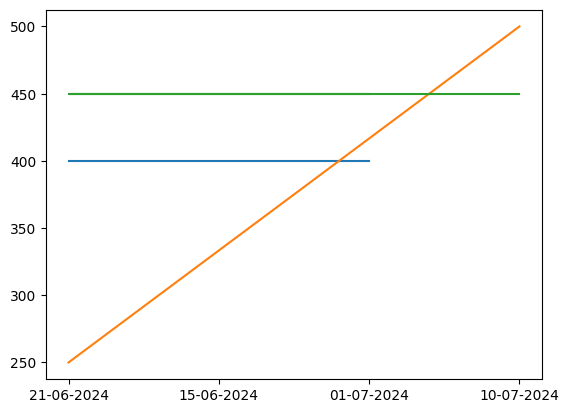

In [32]:

for cur_item_name in dict_item_name:
    cur_df = sale_item_df[sale_item_df["item_name"] == cur_item_name]
    
    x = list(set(cur_df["created_date"].to_numpy()))
    # ['21-06-2024', '15-06-2024', '01-07-2024']
    # ['10-07-2024', '21-06-2024']
    # ['10-07-2024', '21-06-2024', '01-07-2024']
    y = []
    for cur_x in x:
        temp_y = cur_df[cur_df["created_date"] == cur_x]["profit"].to_numpy()
        y.append(np.sum(temp_y))
    # print(cur_item_name)
    # print(x)
    # print(y)
    plt.plot(x,y)
plt.show()


In [ ]:
# super_coffee
# ['21-06-2024', '15-06-2024', '01-07-2024']
# [np.int64(400), np.int64(400), np.int64(400)]
# hsu_coffee
# ['10-07-2024', '21-06-2024']
# [np.int64(500), np.int64(250)]
# sunday_coffee
# ['10-07-2024', '21-06-2024', '01-07-2024']
# [np.int64(450), np.int64(450), np.int64(450)]